In [1]:
# imports

import os
import random
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, Dataset, DatasetDict
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
import pickle

c:\Users\vijib\projects\llm_eng_manual\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# environment

load_dotenv(override=True)
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY', 'your-key-if-not-using-env')
os.environ['ANTHROPIC_API_KEY'] = os.getenv('ANTHROPIC_API_KEY', 'your-key-if-not-using-env')
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN', 'your-key-if-not-using-env')

In [3]:
# Log in to HuggingFace

hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [4]:
# More imports after HF login

from loaders import ItemLoader
from items import Item

In [5]:
items = ItemLoader("Appliances").load()

Loading dataset Appliances


100%|██████████| 95/95 [01:35<00:00,  1.00s/it]


Completed Appliances with 28,625 datapoints in 1.7 mins


In [6]:
print(items[1].prompt)

How much does this cost to the nearest dollar?

Door Pivot Block - Compatible Kenmore KitchenAid Maytag Whirlpool Refrigerator - Replaces - Quick DIY Repair Solution
Pivot Block For Vernicle Mullion Strip On Door - A high-quality exact equivalent for part numbers and Compatibility with major brands - Door Guide is compatible with Whirlpool, Amana, Dacor, Gaggenau, Hardwick, Jenn-Air, Kenmore, KitchenAid, and Maytag. Quick DIY repair - Refrigerator Door Guide Pivot Block Replacement will help if your appliance door doesn't open or close. Wear work gloves to protect your hands during the repair process. Attentive support - If you are uncertain about whether the block fits your refrigerator, we will help. We generally put forth a valiant effort to guarantee you are totally

Price is $17.00


In [7]:
dataset_names = [
    # "Automotive",
    # "Electronics",
    # "Office_Products",
    # "Tools_and_Home_Improvement",
    # "Cell_Phones_and_Accessories",
    # "Toys_and_Games",
    "Appliances",
    # "Musical_Instruments",
]

In [6]:
items = []
for dataset_name in dataset_names:
    loader = ItemLoader(dataset_name)
    items.extend(loader.load())
    

Loading dataset Appliances


100%|██████████| 95/95 [00:41<00:00,  2.26it/s]


Completed Appliances with 28,625 datapoints in 0.8 mins


In [8]:
print(f"A grand total of {len(items):,} items")

A grand total of 28,625 items


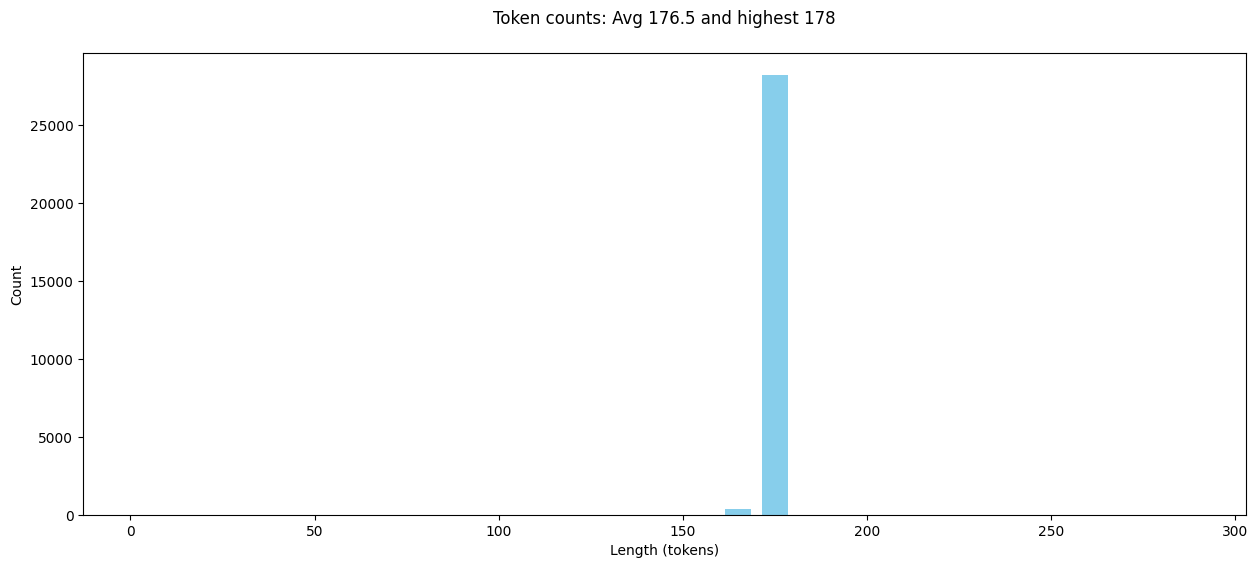

In [9]:
tokens = [item.token_count for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Token counts: Avg {sum(tokens)/len(tokens):,.1f} and highest {max(tokens):,}\n")
plt.xlabel('Length (tokens)')
plt.ylabel('Count')
plt.hist(tokens, rwidth=0.7, color="skyblue", bins=range(0, 300, 10))
plt.show()

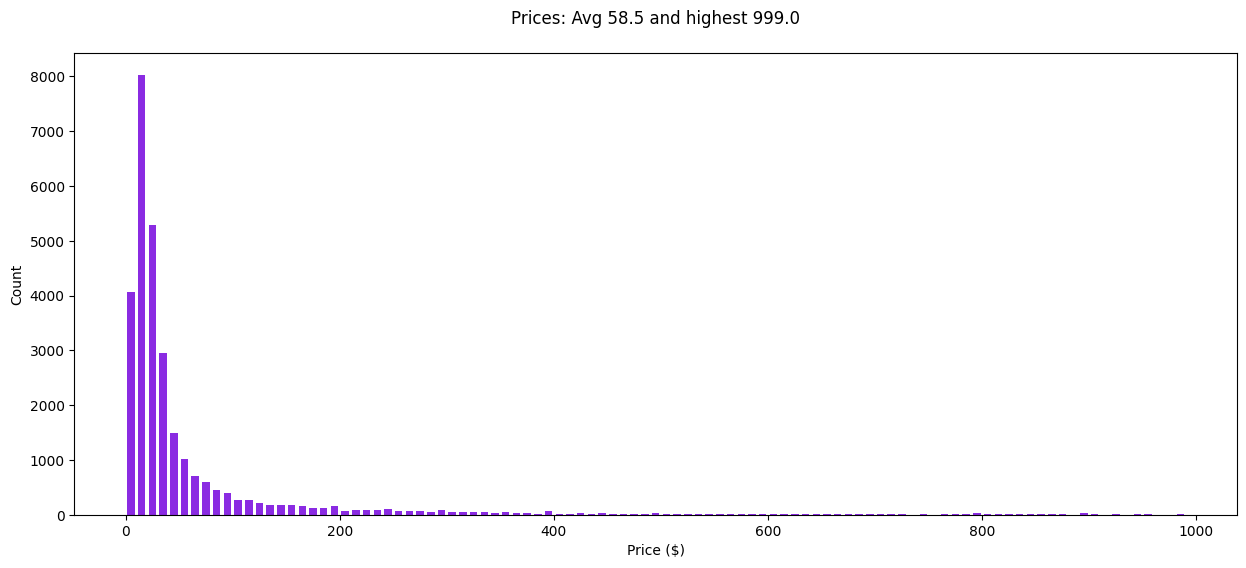

In [9]:
# Plot the distribution of prices

prices = [item.price for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="blueviolet", bins=range(0, 1000, 10))
plt.show()

In [10]:
items[0].prompt

'How much does this cost to the nearest dollar?\n\nRack Roller and stud assembly Kit (4 Pack) by AMI PARTS Replaces\nPARTS NUMBER The dishwasher top rack wheels and stud assembly Kit （4 pcs） SCOPE OF APPLICATION The dishwasher works with most top name brands,If you are not sure if part is correct, ask us in Customer questions & answers section or visiting the AMI PARTS storefront.We’re happy to help ensure you select the correct part for your Rack Roller and stud REPLACES PART FIXES SYMPTOMS Door won’t close | Not cleaning dishes properly | Noisy | Door latch failure QUALITY WARRANTY The replacement part is made from durable high quality material and well-tested by manufacturer.For any reason you’re not satisfied,you can ask for a replacement or full refund Brand Name AMI PARTS, Model\n\nPrice is $9.00'

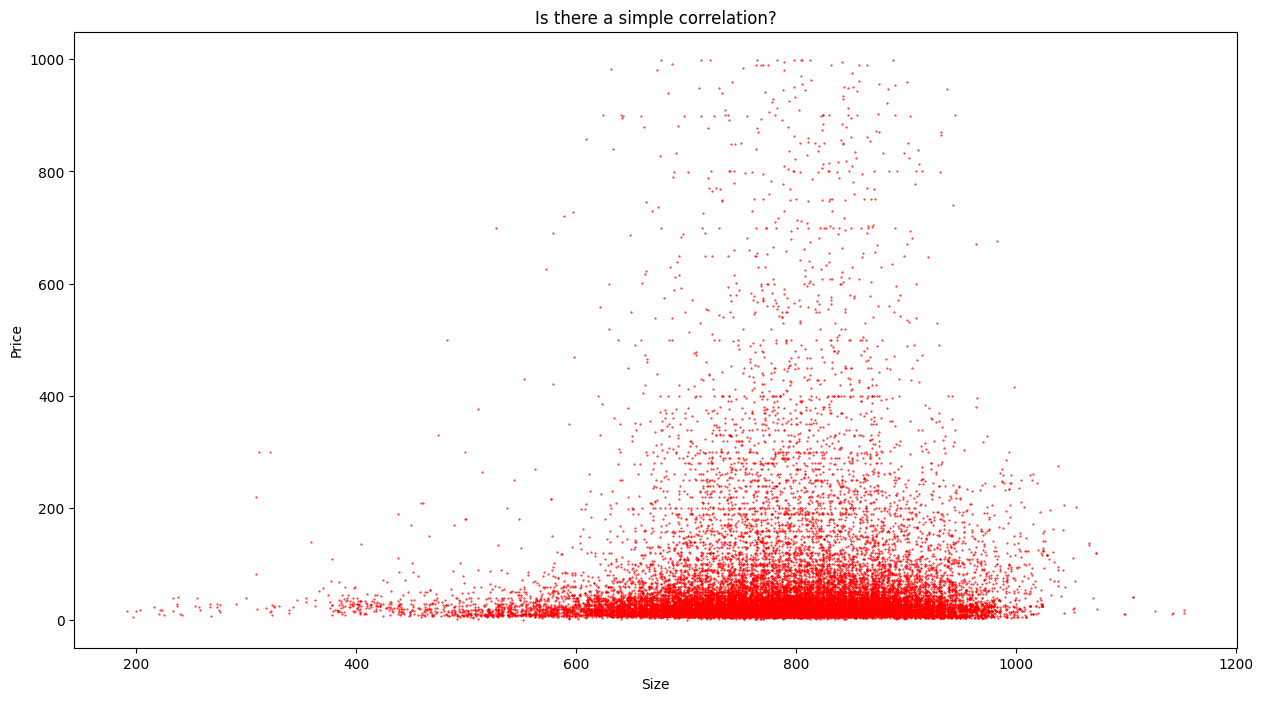

In [12]:
# How does the price vary with the character count of the prompt?

sample = items

sizes = [len(item.prompt) for item in sample]
prices = [item.price for item in sample]

# Create the scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(sizes, prices, s=0.2, color="red")

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Is there a simple correlation?')

# Display the plot
plt.show()

In [13]:
def report(item):
  prompt = item.prompt
  tokens = Item.tokenizer.encode(prompt)
  print(prompt)
  print("Tokens")
  print(tokens[-10:])
  print(Item.tokenizer.batch_decode(tokens[-10:]))
report(sample[50])

How much does this cost to the nearest dollar?

285746 OR 285811 Washer Agitator Support And Dogs Compatible with Inglis, Whirlpool, Kenmore, Roper, Admiral
285746 OR 285811 Agitator support and dogs Washing machine agitator repair kit with a medium length cam Agitator support and dogs for two piece agitators.This kit should be used when the top part of the agitator is not moving properly but the bottom part is. Replaces Old Numbers 2744 285746 285811 Washer Agitator Repair Kit. This part works with the following brands Whirlpool, Roper, Admiral, Maytag, Hardwick, Jenn-Air, Estate, Magic Chef, Crosley, Inglis, Norge, Modern Maid, Amana, Kenmore

Price is $8.00
Tokens
[11, 14594, 6518, 271, 7117, 374, 400, 23, 13, 410]
[',', ' Ken', 'more', '\n\n', 'Price', ' is', ' $', '8', '.', '00']


In [14]:
random.seed(42)
random.shuffle(sample)
train = sample[:25000]
test = sample[25000:27000]
print(f"Divided into a training set of {len(train):,} items and test set of {len(test):,} items")

Divided into a training set of 25,000 items and test set of 2,000 items


In [15]:
print(train[0].prompt)
print(test[0].test_prompt())

How much does this cost to the nearest dollar?

and Replacement Range Cooktop Drip Pans fit GE, Hotpoint - Two 6 Inch and Two 8 Inch Pans (4 pieces)
Contents 2 x (6 inches) and 2 x (8 inches) bowls, 4 drip bowls total Compatibility This replacement kit works with GE, Hotpoint, Moffat, Monogram (GE), Profile (GE), RCA (GE), and Roper models prior to 1996. replaces 65975, replaces and 65974, 770169 Premium quality Drip bowls are made of durable high-quality material. It features a chrome finish, well-tested by the manufacturer. Durable, stick-free, easy to clean, and dishwasher safe. Ensure long-lasting and effective performance Easy to install Shut off electrical power, tilt the coil

Price is $12.00
How much does this cost to the nearest dollar?

Setpower Insulated Protective Cover for AJ30 Portable Refrigerator Freezer, suitable for AJ30 Only
Insulation & Waterproof well-made insulation could save battery power and improve cooling efficiency by preventing cold air from flowing away. D

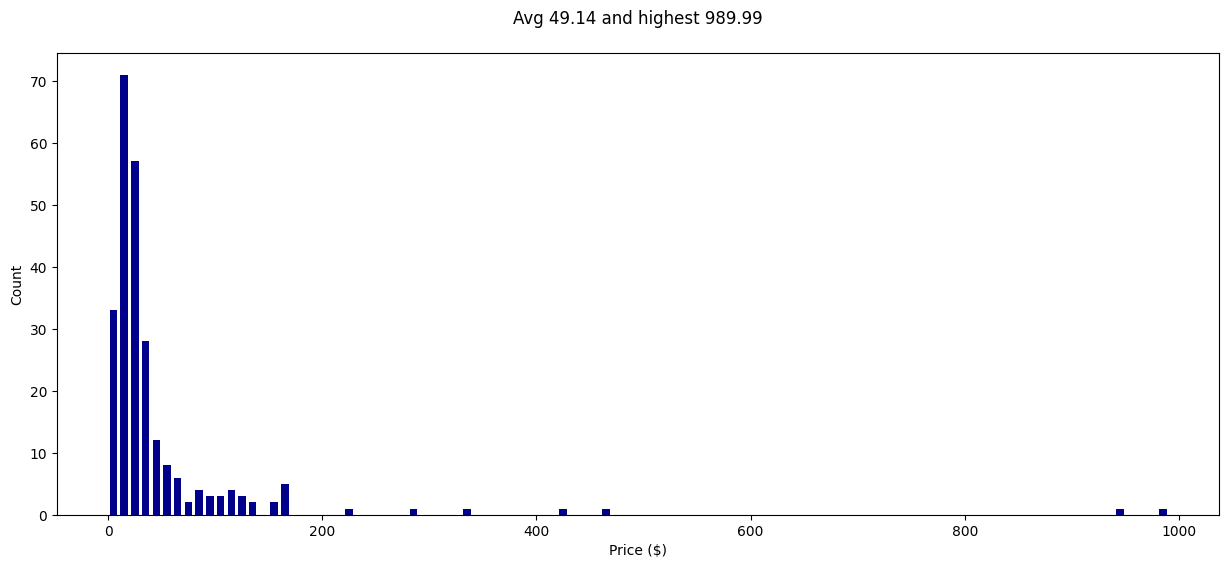

In [19]:
# Plot the distribution of prices in the first 250 test points

prices = [float(item.price) for item in test[:250]]
plt.figure(figsize=(15, 6))
plt.title(f"Avg {sum(prices)/len(prices):.2f} and highest {max(prices):,.2f}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="darkblue", bins=range(0, 1000, 10))
plt.show()

In [16]:
train_prompts = [item.prompt for item in train]
train_prices = [item.price for item in train]
test_prompts = [item.test_prompt() for item in test]
test_prices = [item.price for item in test]

In [17]:
# crate datasets from the lists
train_dataset = Dataset.from_dict({"text":train_prompts,"price":train_prices})

test_dataset = Dataset.from_dict({"text": test_prompts, "price": test_prices})

dataset = DatasetDict({
  "train":train_dataset,
  "test":test_dataset
})

In [18]:
dataset_name = "Sakthi100/lite-data"
dataset.push_to_hub(dataset_name, private=True)


Creating parquet from Arrow format: 100%|██████████| 25/25 [00:01<00:00, 15.47ba/s]
Processing Files (1 / 1): 100%|██████████| 9.70MB / 9.70MB, 1.21MB/s  
New Data Upload: |          |  0.00B /  0.00B,  0.00B/s  
Creating parquet from Arrow format: 100%|██████████| 2/2 [00:00<00:00,  5.01ba/s]
Processing Files (1 / 1): 100%|██████████|  769kB /  769kB,  0.00B/s  
New Data Upload: |          |  0.00B /  0.00B,  0.00B/s  
Uploading the dataset shards: 100%|██████████| 1/1 [00:06<00:00,  6.77s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/Sakthi100/lite-data/commit/9086a7fb21b394d1a7e7af8f296b49fa65d47120', commit_message='Upload dataset', commit_description='', oid='9086a7fb21b394d1a7e7af8f296b49fa65d47120', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/Sakthi100/lite-data', endpoint='https://huggingface.co', repo_type='dataset', repo_id='Sakthi100/lite-data'), pr_revision=None, pr_num=None)

In [ ]:
from litellm import completion 
from dotenv import load_dotenv
import json
from pricer.batch import Batch
from pricer.items import Item


In [ ]:
!pip install groq

## NEW DAY 2

In [5]:
from litellm import completion
from dotenv import load_dotenv
import json
from pricer.batch import Batch
from pricer.items import Item

load_dotenv(override=True)

c:\Users\vijib\projects\llm_eng_manual\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
!pip install groq

In [4]:
LITE_MODE=True

In [6]:
username = "ed-donner"
dataset = f"{username}/items_raw_lite" if LITE_MODE else f"{username}/items_raw_full"

train, val, test = Item.from_hub(dataset)

items = train + val + test

print(f"Loaded {len(items):,} items")
print(items[0])

c:\Users\vijib\projects\llm_eng_manual\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\vijib\.cache\huggingface\hub\datasets--ed-donner--items_raw_lite. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating test split: 100%|██████████| 1000/1000 [00:00<00:00, 54110.28 examples/s]


Loaded 22,000 items
title='Schlage F59 AND 613 Andover Interior Knob with Deadbolt, Oil Rubbed Bronze (Interior Half Only)' category='Tools_and_Home_Improvement' price=64.3 full='Schlage F59 AND 613 Andover Interior Knob with Deadbolt, Oil Rubbed Bronze (Interior Half Only)\n[\'From the Manufacturer\', "When you have a Schlage handleset on your front door, you ensure your security as well as your peace of mind. After all, we\'re the leader in security devices, trusted for over 85 years. All Schlage handlesets are precision engineered, featuring 100% solid"]\n[\'Interior half only\', \'Requires F58 to complete handle set\', \'Non handed knob style\', \'4" minimum center to center door prep required for this two piece model.\', \'Lifetime Mechanical and Finish Warranty\']\n{"Material": "Metal", "Brand": "", "Color": "Oil Rubbed Bronze", "Exterior Finish": "Bronze", "Special Feature": "Easy to Install", "Age Range (Description)": "Adult", "Included Components": "Deadbolt, Knob", "Item Wei

In [8]:
print(items[2].id)

None


In [9]:
for index,item in enumerate(items):
  item.id=index

In [10]:
print(items[2].id)

2


In [11]:

  
SYSTEM_PROMPT = """Create a concise description of a product. Respond only in this format. Do not include part numbers.
Title: Rewritten short precise title
Category: eg Electronics
Brand: Brand name
Description: 1 sentence description
Details: 1 sentence on features"""

In [12]:
print(items[0].full)

Schlage F59 AND 613 Andover Interior Knob with Deadbolt, Oil Rubbed Bronze (Interior Half Only)
['From the Manufacturer', "When you have a Schlage handleset on your front door, you ensure your security as well as your peace of mind. After all, we're the leader in security devices, trusted for over 85 years. All Schlage handlesets are precision engineered, featuring 100% solid"]
['Interior half only', 'Requires F58 to complete handle set', 'Non handed knob style', '4" minimum center to center door prep required for this two piece model.', 'Lifetime Mechanical and Finish Warranty']
{"Material": "Metal", "Brand": "", "Color": "Oil Rubbed Bronze", "Exterior Finish": "Bronze", "Special Feature": "Easy to Install", "Age Range (Description)": "Adult", "Included Components": "Deadbolt, Knob", "Item Weight": "1.5 pounds", "Handle Material": "Bronze", "Package Type": "Standard Packaging", "Unit Count": "1.0 Count", "Number of Items": "1", "Manufacturer": "Schlage", "Product Dimensions": "8.1 x 4

In [14]:
messages = [{'role':'system','content':SYSTEM_PROMPT},{'role':'user','content':items[0].full}]
response = completion(messages=messages,model="groq/openai/gpt-oss-20b",reasoning_effort="low")

print(response.choices[0].message.content)
print(f"Input tokens: {response.usage.prompt_tokens}")
print(f"Output tokens: {response.usage.completion_tokens}")
print(f"Cost: {response._hidden_params['response_cost']*100:.3f} cents")


Title: Schlage F59 Interior Half Knob with Deadbolt – Oil Rubbed Bronze  
Category: Hardware & Door Hardware  
Brand: Schlage  
Description: A high‑security interior half knob set featuring an integrated deadbolt, finished in durable oil‑rubbed bronze.  
Details: Designed for 4" minimum center‑to‑center doors, it includes easy installation, a lifetime mechanical and finish warranty, and requires an F58 handle for a complete set.
Input tokens: 446
Output tokens: 108
Cost: 0.010 cents


In [15]:
messages = [{'role':'system','content':SYSTEM_PROMPT},{'role':'user','content':items[0].full}]
ollama_model = "ollama/llama3.2:1b"
response = completion(messages=messages,model=ollama_model,api_base="http://localhost:11434")
print(response.choices[0].message.content)

print()
print(f"Input tokens: {response.usage.prompt_tokens}")
print(f"Output tokens: {response.usage.completion_tokens}")
print(f"Cost: {response._hidden_params['response_cost']*100:.3f} cents")


Rewritten Schlage F59 AND 613 Interior Knob with Deadbolt
This interior knob features a non-handed style and provides a secure and reliable deadbolt option for added security. 

Requires the Schlage F58 handleset to complete, has a 4" minimum center-to-center door prep requirement, and is made of oil rubbed bronze material.

Input tokens: 406
Output tokens: 72
Cost: 0.000 cents


In [19]:
import json
def make_jsonl(item):
  body = {"model":"openai/gpt-oss-20b","messages":[{'role':'system','content':SYSTEM_PROMPT},{'role':'user','content':item.full}],'reasoning_effort':'low'}
  line = {"custom_id":str(item.id),'method':'POST','url':'/v1/chat/completions','body':body}
  return json.dumps(line)

In [20]:
make_jsonl(items[0])

'{"custom_id": "0", "method": "POST", "url": "/v1/chat/completions", "body": {"model": "openai/gpt-oss-20b", "messages": [{"role": "system", "content": "Create a concise description of a product. Respond only in this format. Do not include part numbers.\\nTitle: Rewritten short precise title\\nCategory: eg Electronics\\nBrand: Brand name\\nDescription: 1 sentence description\\nDetails: 1 sentence on features"}, {"role": "user", "content": "Schlage F59 AND 613 Andover Interior Knob with Deadbolt, Oil Rubbed Bronze (Interior Half Only)\\n[\'From the Manufacturer\', \\"When you have a Schlage handleset on your front door, you ensure your security as well as your peace of mind. After all, we\'re the leader in security devices, trusted for over 85 years. All Schlage handlesets are precision engineered, featuring 100% solid\\"]\\n[\'Interior half only\', \'Requires F58 to complete handle set\', \'Non handed knob style\', \'4\\" minimum center to center door prep required for this two piece m

In [21]:
def make_file(start,end,filename):
  batch_file = filename
  with open(batch_file,'w') as f:
    for i in range(start,end):
      f.write(make_jsonl(items[i]))
      f.write("\n")

In [23]:
make_file(0,1000,'jsonl/0_1000.jsonl')

In [24]:
import os
from groq import Groq

groq = Groq(api_key=os.environ.get("GROQ_API_KEY"))

In [26]:
with open('jsonl/0_1000.jsonl','rb') as f:
  response = groq.files.create(file=f,purpose="batch")
response

FileCreateResponse(id='file_01ke9v4y5qf5svnn8q949vqtdc', bytes=2231443, created_at=1767709505, filename='0_1000.jsonl', object='file', purpose='batch', size=0, md5='mFTQtRuU7PloLJh0WmavBA==', content_type='application/jsonl')

In [27]:
file_id = response.id
file_id

'file_01ke9v4y5qf5svnn8q949vqtdc'

In [28]:
response = groq.batches.create(completion_window="48h",endpoint='/v1/chat/completions',input_file_id=file_id)

In [32]:
result = groq.batches.retrieve(response.id)
print(result.output_file_id)

file_01ke9vwn77ekxrvk3jewg8rkhd


In [34]:
response = groq.files.content('file_01ke9vwn77ekxrvk3jewg8rkhd')
response.write_to_file('jsonl/batch_results.jsonl')

In [37]:
with open("jsonl/batch_results.jsonl",'r',encoding="utf-8") as f:
  for line in f:
    json_line = json.loads(line)
    id = int(json_line["custom_id"])
    summary = json_line["response"]['body']['choices'][0]['message']['content']
    items[id].summary = summary


In [42]:
print(items[999].summary)

Title: DG94-00520A Gas Range Hot Surface Igniter Assembly Replacement  
Category: Appliance Parts  
Brand: Supplying Demand  
Description: A high‑current igniter assembly that lights gas flames on hot‑surface ranges.  
Details: 3.4–3.6 A, 1‑1/2″ block, 3‑3/4″ cage, 8″ leads with female pins, designed for model‑specific ranges.
